# Лабороторна робота 1

In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
import pandas as pd

In [22]:
img_blue = cv2.imread('img_1.jpg')

img_blue_2 = cv2.imread('img_2.jpg')
img_1 = cv2.cvtColor(img_blue, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_blue_2, cv2.COLOR_BGR2RGB)

In [23]:
def func(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(img1)
    axs[0].set_title('Image 1')


    axs[1].imshow(img2)
    axs[1].set_title('Result')
    
    plt.tight_layout()
    plt.show()

In [56]:
def inversion(img):
    return 255 - img

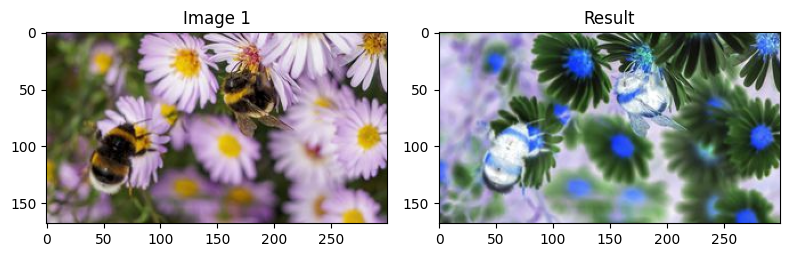

In [57]:
result_1 = inversion(img)
func(img, result_1)

для деякої (однієї з трьох) компонент виконує зміну, наприклад, до
кожного пікселя додає якесь постійне значення. Вивести усі
зображення в об’єкти типу ImageView.

In [26]:
def b(img):
    add = 60
    output = img.copy().astype(np.uint16)
    output[:, :, 2] = np.clip(output[:, :, 2] + add, 0, 255) 


    return output.astype(np.uint8)


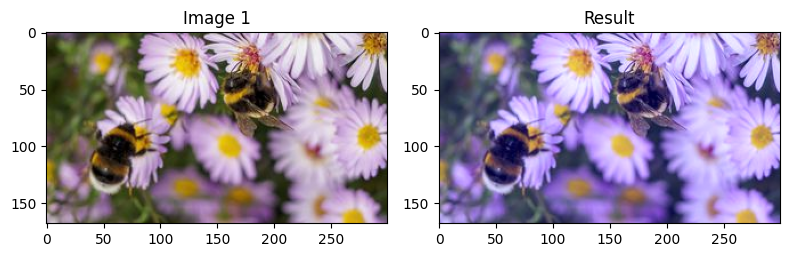

In [27]:
result_b = b(img)

func(img, result_b)

виконує розбивку зображення на компоненти Red, Green та Blue.

Text(0.5, 1.0, 'Blue Channel')

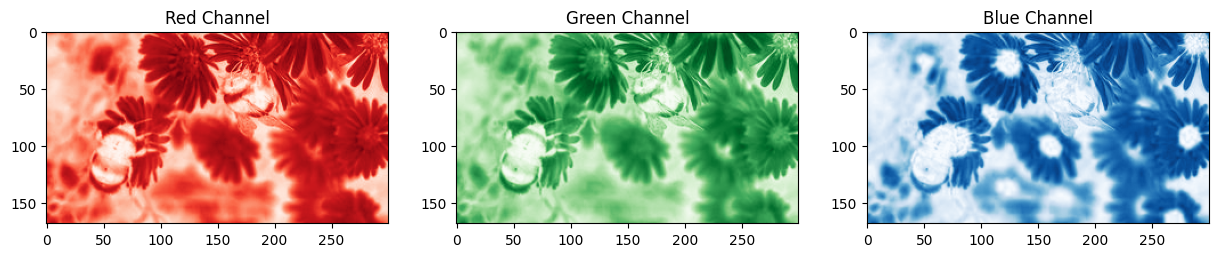

In [28]:
r, g, b = cv2.split(img)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(r, cmap='Reds')
axs[0].set_title('Red Channel')

axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Green Channel')


axs[2].imshow(b, cmap='Blues')
axs[2].set_title('Blue Channel')

виконує «злиття» двох зображень у певних пропорціях (долях від
одиниці, яка береться за 100%). Наприклад, якщо «вклад» першого

зображення у нове складає 0.4, то «вклад» другого – 1-0.4=0.6. У
загальному «вклад» першого зображення позначимо через α, а «вклад»
другого – (1 − α). Тоді шукане зображення можна записати у
наступному вигляді:

In [ ]:

def D(img1, img2, a):
    img1 = cv2.resize(img1, (300, 300))
    img2 = cv2.resize(img2, (300, 300))

    output = np.zeros_like(img1, dtype=np.float32)

    plt.figure(figsize=(15, 5))

    for idx, alfa in enumerate(np.arange(0, a + 0.1, 0.1)):
        output = alfa * img1 + (1 - alfa) * img2
        
        output = np.clip(output, 0, 255).astype(np.uint8)

        plt.subplot(2, 5, idx + 1)  
        plt.imshow(output)  
        plt.title(f'Merged Image with α = {alfa:.1f}')
        plt.axis('off')  

    plt.tight_layout()
    plt.show()

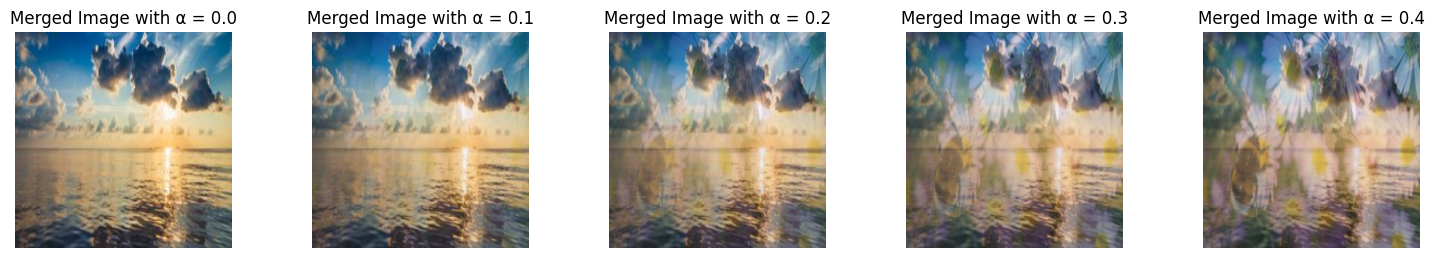

In [31]:
D(img_1, img_2, 0.4)

виконує фільтрацію вхідного зображення з використанням матричних
фільтрів, що описані у лабораторній роботі (фільтр розмиття, фільтр
поліпшення чіткості, медіанний фільтр, фільтр ерозії і нарощування та
фільтр Собеля).

In [32]:
def sharpen(image): # поліпшення чіткості,
    
    kernel = np.array([ [-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

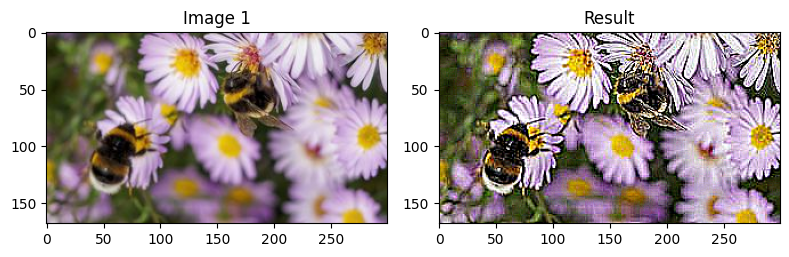

In [33]:
img_res = sharpen(img)
func(img, img_res)

In [34]:
def func_1(image, kernel): # медіанний

    output = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):

            matrix = image[i:i + kernel, j:j+kernel]

            for k in range(image.shape[2]):
                output[i][j][k] = np.median(matrix[:,:,k])
                
    return output.astype(np.uint8) 

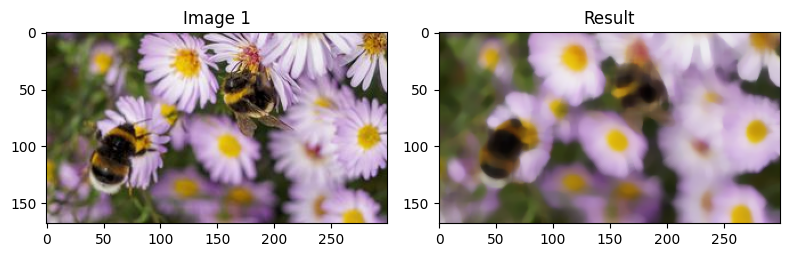

In [35]:
result_e_2 = func_1(img, 10)

func(img, result_e_2)

In [36]:
def gaussian(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

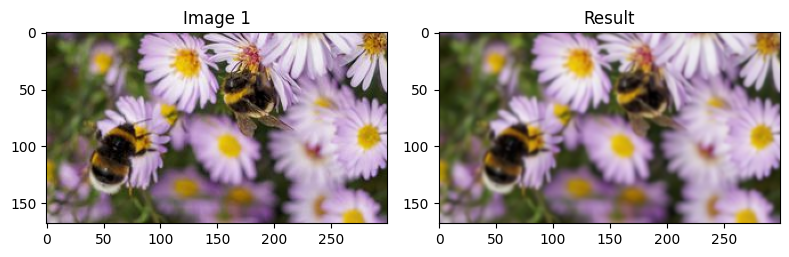

In [37]:
img_blured = gaussian(img)

func(img, img_blured)

In [38]:
kernel = np.ones((5, 5), np.uint8)

erosion = cv2.erode(img, kernel, iterations=1)


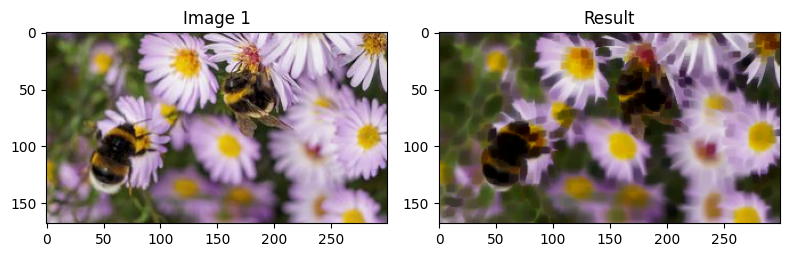

In [39]:
func(img, erosion)

In [40]:
dilation = cv2.dilate(img, kernel, iterations=1)

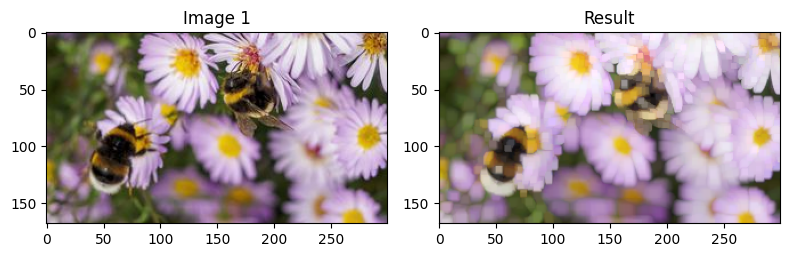

In [41]:
func(img, dilation)

In [50]:
def sobel_filter(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  
    sobel_image = cv2.sqrt(sobel_x**2 + sobel_y**2)  
    return cv2.convertScaleAbs(sobel_image)

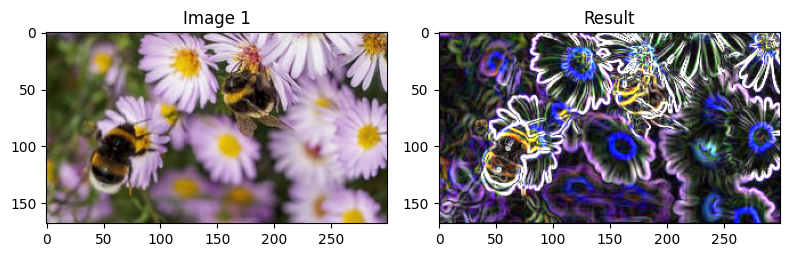

In [51]:
sobel_foto = sobel_filter(img)

func(img, sobel_foto)